# Chapter 3 - Modeling and prediction

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### The Titanic dataset

We use the Pandas library to import the Titanic survival dataset.

In [95]:
import pandas
data = pandas.read_csv("data/titanic.csv")
data.iloc[:, :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [42]:
import numpy as np

In [81]:
data = data.sample(frac=1)

In [96]:
# We make a 80/20% train/test split of the data
data_train = data[:int(0.8*len(data))]
data_test = data[int(0.8*len(data)):]

In [97]:
unique(data['Embarked'].fillna(""))

array(['', 'C', 'Q', 'S'], dtype=object)

### Preparing the data

In [84]:
# The categorical-to-numerical function from chapter 2
# Changed to automatically add column names
def cat_to_num(data):
    categories = unique(data)
    features = {}
    for cat in categories:
        binary = (data == cat)
        features["%s=%s" % (data.name, cat)] = binary.astype("int")
    return pandas.DataFrame(features)

In [98]:
def prepare_data(data):
    """Takes a dataframe of raw data and returns ML model features
    """
    
    # Initially, we build a model only on the available numerical values
    features = data.drop(["PassengerId", "Survived", "Fare", "Name", "Sex",
                          "Ticket", "Cabin", "Embarked"], axis=1)
    
    # Setting missing age values to -1
    features["Age"] = data["Age"].fillna(-1)
    
    # Adding the sqrt of the fare feature
    features["sqrt_Fare"] = sqrt(data["Fare"])
    
    # Adding gender categorical value
    features = features.join( cat_to_num(data['Sex']) )
    
    # Adding Embarked categorical value
    features = features.join( cat_to_num(data['Embarked'].fillna("")) )    
    return features

### Building a logistic regression classifier with Scikit-Learn

In [99]:
#cat_to_num(data['Sex'])
features = prepare_data(data_train)
features[:5]

,Pclass,Age,SibSp,Parch,sqrt_Fare,Sex=female,Sex=male,Embarked=,Embarked=C,Embarked=Q,Embarked=S
0,3,22.0,1,0,2.692582,0,1,0,0,0,1
1,1,38.0,1,0,8.442944,1,0,0,1,0,0
2,3,26.0,0,0,2.815138,1,0,0,0,0,1
3,1,35.0,1,0,7.286975,1,0,0,0,0,1
4,3,35.0,0,0,2.837252,0,1,0,0,0,1


In [100]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [102]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(features, data_train["Survived"])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [103]:
data_test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
712,713,1,1,"Taylor, Mr. Elmer Zebley",male,48.0,1,0,19996,52.0000,C126,S
713,714,0,3,"Larsson, Mr. August Viktor",male,29.0,0,0,7545,9.4833,NaN,S
714,715,0,2,"Greenberg, Mr. Samuel",male,52.0,0,0,250647,13.0000,NaN,S
715,716,0,3,"Soholt, Mr. Peter Andreas Lauritz Andersen",male,19.0,0,0,348124,7.6500,F G73,S
716,717,1,1,"Endres, Miss. Caroline Louise",female,38.0,0,0,PC 17757,227.5250,C45,C


In [104]:
model.coef_
#prepare_data(data_test)[5:]

array([[-0.86103118, -0.01263601, -0.2364916 , -0.13335933,  0.05162915,
         1.3233092 , -1.32359798,  0.07000599,  0.11038353, -0.00182877,
        -0.17884953]])

In [105]:
# Make predictions
model.predict(prepare_data(data_test))

array([0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0], dtype=int64)

In [106]:
array(data_test["Survived"])

array([1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0], dtype=int64)

In [107]:
# The accuracy of the model on the test data
# (this will be introduced in more details in chapter 4)
print(model.score(prepare_data(data_test), data_test["Survived"]))
print(model.score(prepare_data(data_train), data_train["Survived"]))


0.8324022346368715
0.7837078651685393


In [94]:
model.predict_proba(prepare_data(data_test))

array([[0.86637751, 0.13362249],
       [0.79574425, 0.20425575],
       [0.28541737, 0.71458263],
       [0.03230564, 0.96769436],
       [0.36552031, 0.63447969],
       [0.28286436, 0.71713564],
       [0.85382538, 0.14617462],
       [0.20615928, 0.79384072],
       [0.57667214, 0.42332786],
       [0.40200876, 0.59799124],
       [0.88644304, 0.11355696],
       [0.89743041, 0.10256959],
       [0.826077  , 0.173923  ],
       [0.06861149, 0.93138851],
       [0.03304005, 0.96695995],
       [0.84674874, 0.15325126],
       [0.93765947, 0.06234053],
       [0.9420017 , 0.0579983 ],
       [0.6463027 , 0.3536973 ],
       [0.88688739, 0.11311261],
       [0.89981168, 0.10018832],
       [0.20799506, 0.79200494],
       [0.90850564, 0.09149436],
       [0.8982485 , 0.1017515 ],
       [0.86839476, 0.13160524],
       [0.90143983, 0.09856017],
       [0.19214922, 0.80785078],
       [0.3483818 , 0.6516182 ],
       [0.89315285, 0.10684715],
       [0.02670289, 0.97329711],
       [0.

### Non-linear model with Support Vector Machines

In [122]:
from sklearn.svm import SVC
#model = SVC(gamma=0.05)
#model = SVC(gamma=10.0)
#model = SVC(gamma=100.0)
model = SVC(gamma=0.1,probability=True)
model.fit(features, data_train["Survived"])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [123]:
print(model.score(prepare_data(data_train), data_train["Survived"]))
model.score(prepare_data(data_test), data_test["Survived"])

0.8623595505617978


0.8603351955307262

In [124]:
model.predict(prepare_data(data_test))

array([0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0], dtype=int64)

In [125]:
array(data_test["Survived"])

array([1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0], dtype=int64)

In [126]:
model.predict_proba(prepare_data(data_test))

array([[0.61223408, 0.38776592],
       [0.85605205, 0.14394795],
       [0.84705314, 0.15294686],
       [0.85368288, 0.14631712],
       [0.3961455 , 0.6038545 ],
       [0.20869249, 0.79130751],
       [0.84494316, 0.15505684],
       [0.84000806, 0.15999194],
       [0.09157169, 0.90842831],
       [0.88044474, 0.11955526],
       [0.70276568, 0.29723432],
       [0.77397801, 0.22602199],
       [0.45120448, 0.54879552],
       [0.84717802, 0.15282198],
       [0.42489947, 0.57510053],
       [0.16403501, 0.83596499],
       [0.74835772, 0.25164228],
       [0.33628788, 0.66371212],
       [0.49183439, 0.50816561],
       [0.13811581, 0.86188419],
       [0.84571176, 0.15428824],
       [0.84571855, 0.15428145],
       [0.84571855, 0.15428145],
       [0.86011284, 0.13988716],
       [0.57302049, 0.42697951],
       [0.16842601, 0.83157399],
       [0.85687915, 0.14312085],
       [0.85687915, 0.14312085],
       [0.83243335, 0.16756665],
       [0.21705769, 0.78294231],
       [0.

### Classification with multiple classes: hand-written digits

We use the popular non-linear multi-class K-nearest neighbor algorithm to predict hand-written digits from the MNIST dataset.


In [131]:
mnist = pandas.read_csv("data/mnist_small.csv")
mnist_train = mnist[:int(0.8*len(mnist))]
mnist_test = mnist[int(0.8*len(mnist)):]

In [132]:
mnist_test.head()
mnist_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 800 to 999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 1.2 MB


In [133]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(mnist_train.drop("label", axis=1), mnist_train['label'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [134]:
preds = knn.predict_proba(mnist_test.drop("label", axis=1))
pandas.DataFrame(preds[:5], index=["Digit %d"%(i+1) for i in range(5)])

,0,1,2,3,4,5,6,7,8,9
Digit 1,0.000000,0.0,0.0,0.0,0.000000,1.0,0.000000,0.000000,0.0,0.000000
Digit 2,0.000000,0.0,0.0,1.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000
Digit 3,0.666667,0.0,0.0,0.0,0.000000,0.0,0.333333,0.000000,0.0,0.000000
Digit 4,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.666667,0.0,0.333333
Digit 5,0.000000,0.0,0.0,0.0,0.666667,0.0,0.000000,0.000000,0.0,0.333333


In [135]:
knn.score(mnist_test.drop("label", axis=1), mnist_test['label'])

0.835

### Predicting numerical values with a regression model

We use the the Linear Regression algorithm to predict miles-per-gallon of various automobiles.

In [136]:
auto = pandas.read_csv("data/auto-mpg.csv")

# Convert origin to categorical variable
auto = auto.join(cat_to_num(auto['origin']))
auto = auto.drop('origin', axis=1)

# Split in train/test set
auto_train = auto[:int(0.8*len(auto))]
auto_test = auto[int(0.8*len(auto)):]

auto[:5]

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin=1,origin=2,origin=3
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,0,0


In [151]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=1000)
#reg = LinearRegression()
reg.fit(auto_train.drop('mpg', axis=1), auto_train["mpg"])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [152]:
pred_mpg = reg.predict(auto_test.drop('mpg',axis=1))

# Plotting the Regression

In [153]:
# The coefficients
print('Coefficients: \n', reg.coef_)
coefficients = pandas.concat([pandas.DataFrame(auto_train.drop('mpg',axis=1).columns),pandas.DataFrame(np.transpose(reg.coef_))], axis = 1)
print(coefficients)
print('Intercept: \n', reg.intercept_)

# Plot outputs
plt.scatter(auto_test.weight, auto_test.mpg,  color='black')

plt.xticks(())
plt.yticks(())

plt.show()

AttributeError: 'RandomForestRegressor' object has no attribute 'coef_'

# Scoring the Regression

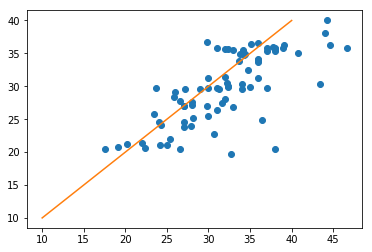

In [154]:
plot(auto_test.mpg, pred_mpg, 'o')
x = linspace(10,40,5)
plot(x, x, '-');

In [155]:
from sklearn.metrics import mean_squared_error, r2_score
print(r2_score(auto_test.mpg, pred_mpg))
print(mean_squared_error(auto_test.mpg, pred_mpg))

0.3869756207131573
22.193710281012464


In [156]:
# Using model score
print(reg.score(auto_test.drop('mpg',axis=1), auto_test.mpg))

0.38697562071315733
